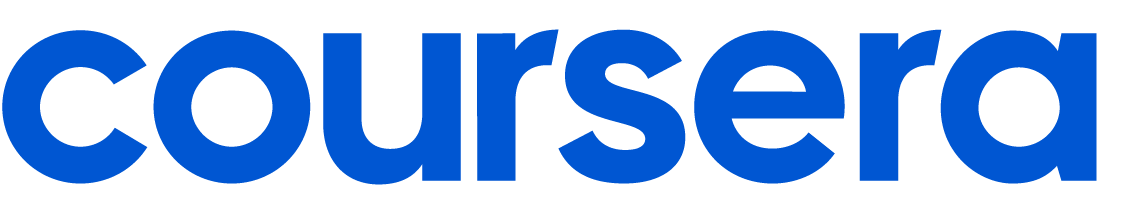

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import any other packages you may want to use
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import he_normal

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

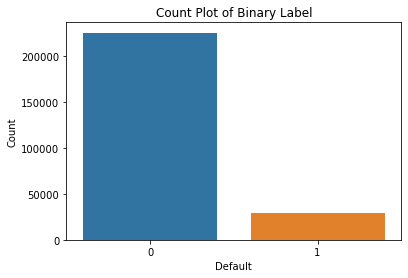

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Count Plot of Binary Label')
plt.show()

As we can see, we have a lot of samples of the '0' class. So, we need to reduce size of the majoriry class

In [8]:
# Separate the majority and minority classes
majority_class = train_df[train_df['Default'] == 0]
minority_class = train_df[train_df['Default'] == 1]

# Randomly select a subset of the majority class samples
desired_majority_size = len(minority_class)
reduced_majority_class = majority_class.sample(n=desired_majority_size, random_state=42)

# Concatenate the minority class and the reduced majority class
balanced_df = pd.concat([reduced_majority_class, minority_class], axis=0)

# Shuffle the DataFrame to mix the class labels
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
balanced_df.shape

(59306, 18)

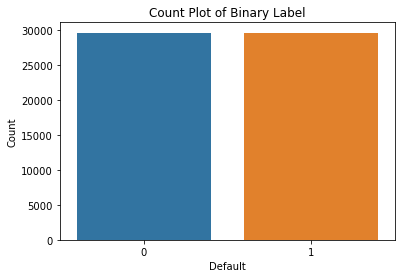

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=balanced_df, x='Default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Count Plot of Binary Label')
plt.show()

## Numerical features

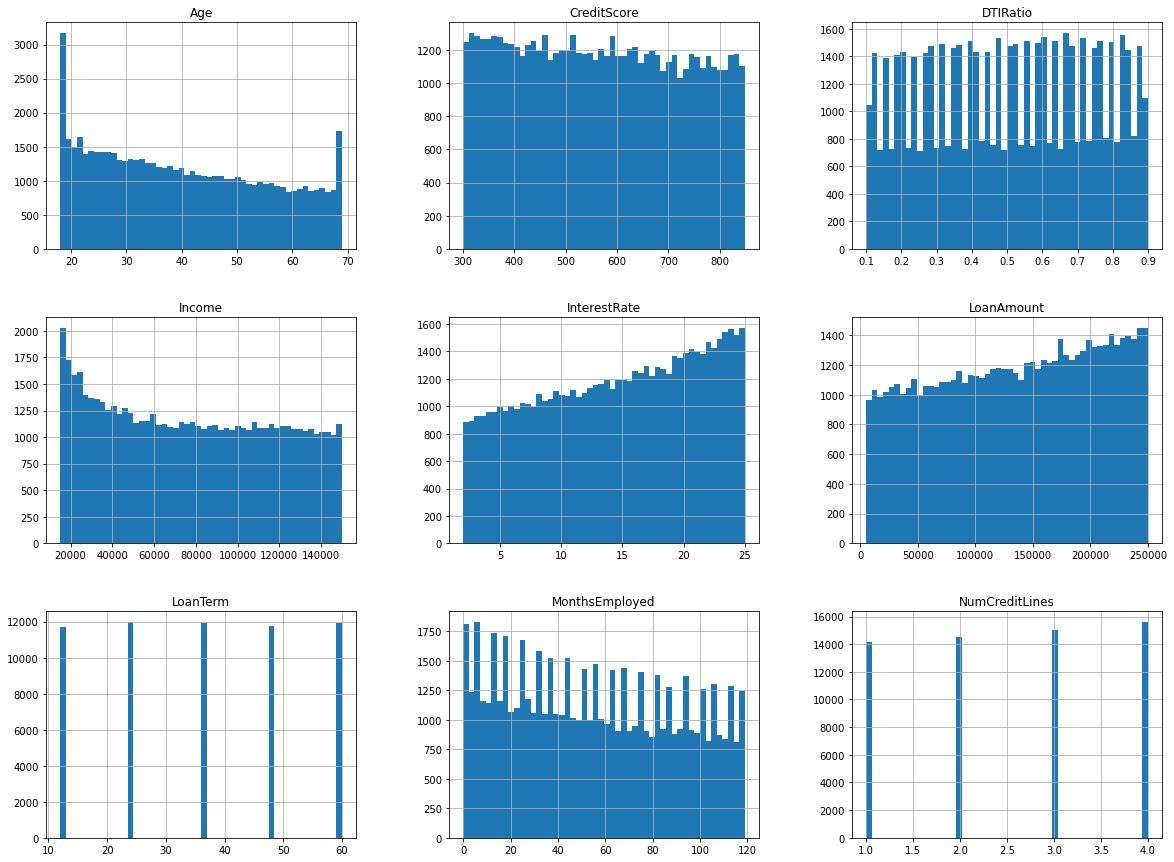

In [11]:
numerical_attribs = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
            'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

balanced_df[numerical_attribs].hist(bins=50, figsize=(20,15))
plt.show()

<b> As we can see, the DTI Ration feature is already in normalized form. Other features have to be normalized. </b> 

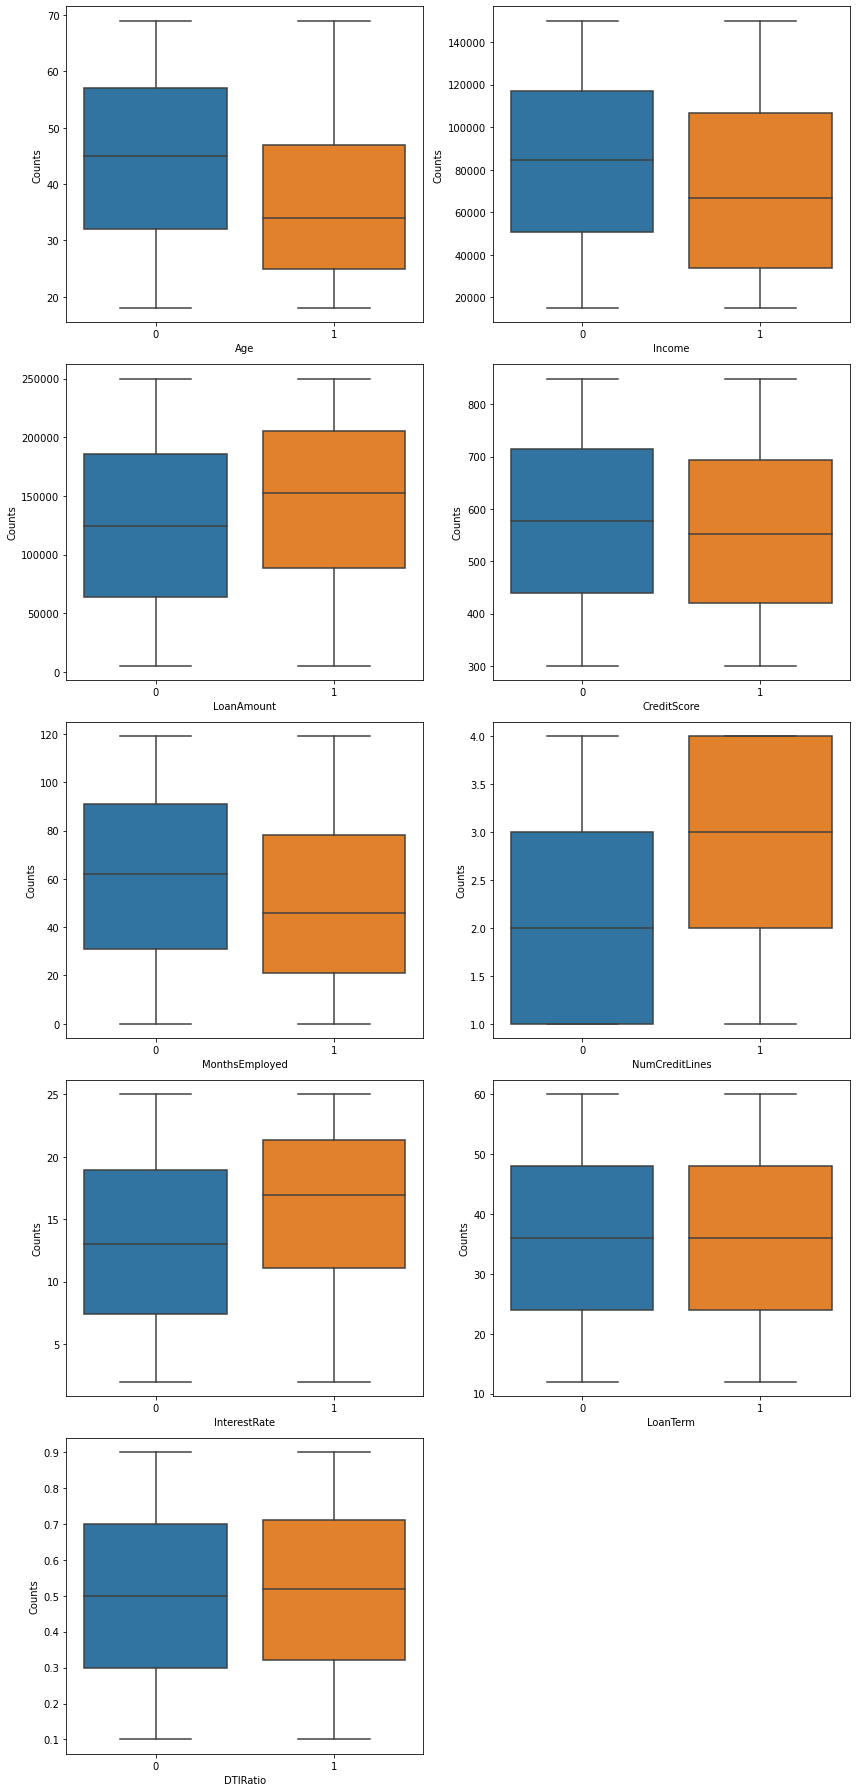

In [12]:
# Create subplots for each column
num_rows = len(numerical_attribs) // 2 + len(numerical_attribs) % 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 5))

for i, column in enumerate(numerical_attribs):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.boxplot(data=balanced_df, x='Default', y=column, ax=ax)
    ax.set_ylabel('Counts')
    ax.set_xlabel(column)
    
    
# Remove any empty subplots
for i in range(len(numerical_attribs), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])
    
plt.tight_layout()
plt.show()

## Categorical data explore

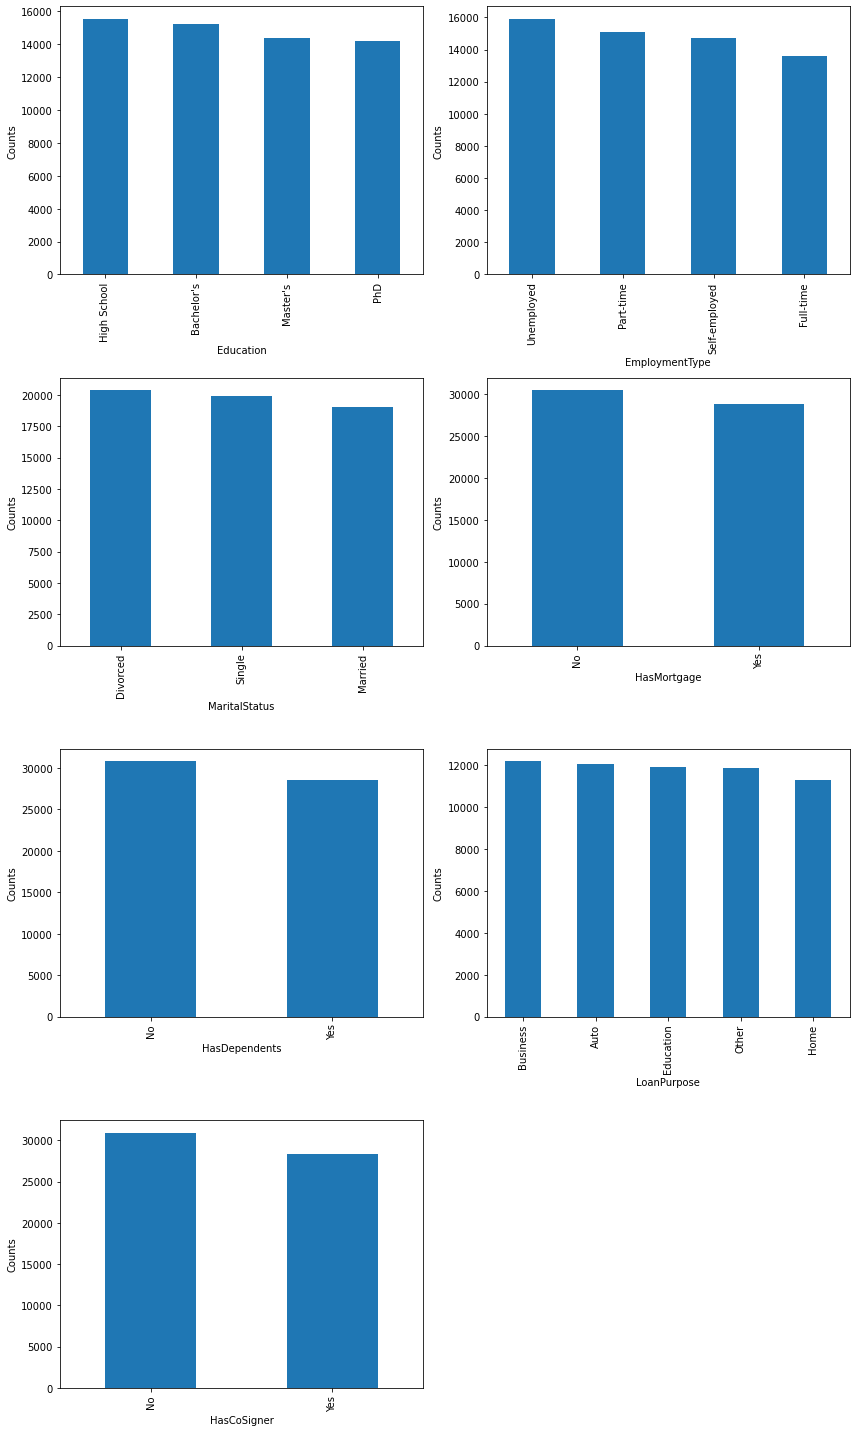

In [13]:
# List of columns you want to plot
categorical_attribs = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Create subplots for each column
num_rows = len(categorical_attribs) // 2 + len(categorical_attribs) % 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 5))

for i, column in enumerate(categorical_attribs):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    balanced_df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_ylabel('Counts')
    ax.set_xlabel(column)
    
    
# Remove any empty subplots
for i in range(len(categorical_attribs), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])
    
plt.tight_layout()
plt.show()

### Count plots

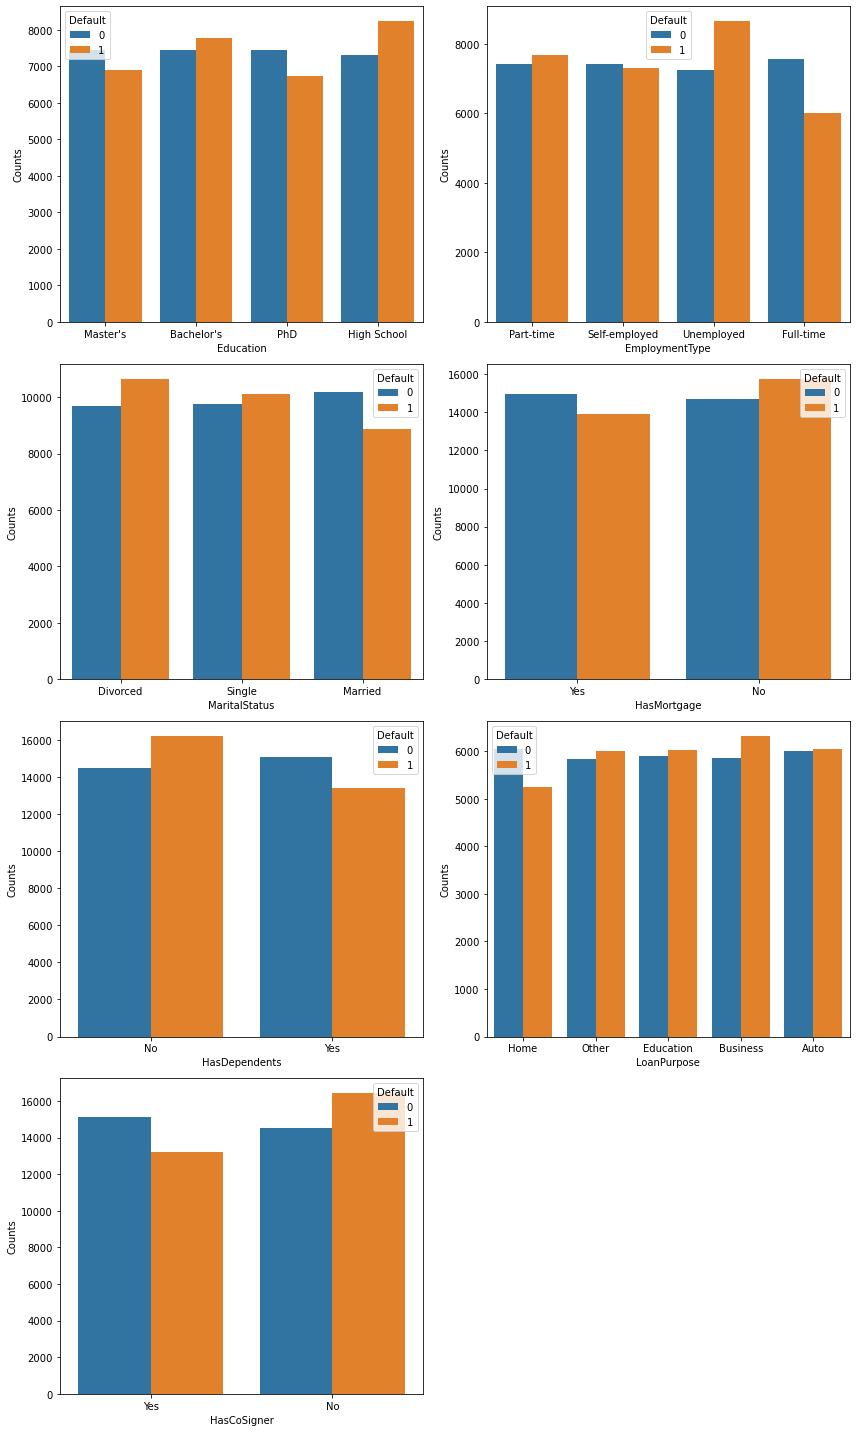

In [14]:
# Create subplots for each column
num_rows = len(categorical_attribs) // 2 + len(categorical_attribs) % 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 5))

for i, column in enumerate(categorical_attribs):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.countplot(data=balanced_df, x=column, hue='Default', ax=ax)
    ax.set_ylabel('Counts')
    ax.set_xlabel(column)
    
    
# Remove any empty subplots
for i in range(len(categorical_attribs), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])
    
plt.tight_layout()
plt.show()

### Correlations

In [15]:
corr_matrix = balanced_df.corr()

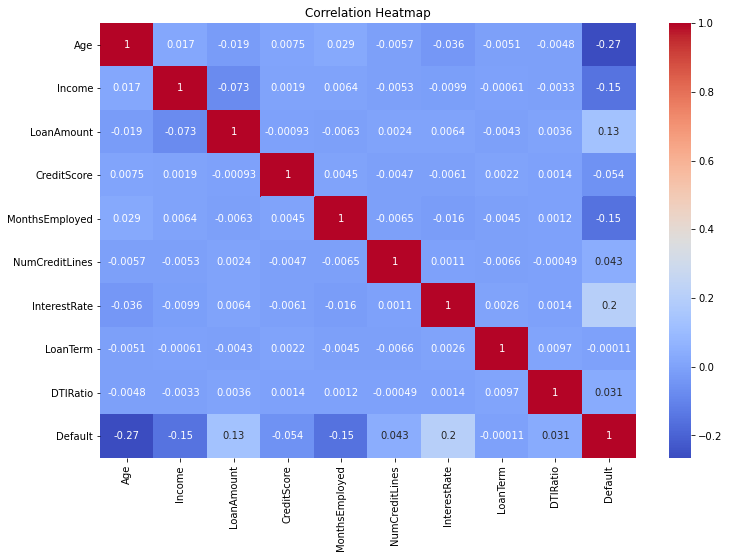

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

As we can see, LoanTerm has too low correlation with Default, so I think it's a good idea to drop it from the training data.

## Transformation pipeline

In [130]:
numerical_features_for_train = ['Age', 'Income', 'LoanAmount', 'MonthsEmployed', 'InterestRate']




categorical_features_for_train = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
                                  'HasDependents', 'LoanPurpose', 'HasCoSigner']


    
used_features = numerical_attribs + categorical_attribs

# all:
#numerical_attribs = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
           # 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
#categorical_attribs = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
# 'HasDependents', 'LoanPurpose', 'HasCoSigner']


In [44]:
used_features

['Age',
 'Income',
 'LoanAmount',
 'CreditScore',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'LoanTerm',
 'DTIRatio',
 'Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

In [131]:
# numerical pipeline
num_pipeline = Pipeline([
    ('std_scaler', MinMaxScaler())
])

# categorial pipeline
cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder())
])

# full pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numerical_features_for_train),
    ('cat', cat_pipeline, categorical_features_for_train)
])

train_preprocessed = full_pipeline.fit_transform(balanced_df)
train_preprocessed[0]

array([0.11764706, 0.33873106, 0.66577004, 0.49579832, 0.3826087 ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        ])

In [132]:
train_data_labels = balanced_df['Default']

print(f'Train features shape: {train_preprocessed.shape}')
print(f'Train labels shape: {train_data_labels.shape}')

Train features shape: (59306, 27)
Train labels shape: (59306,)


## Model Training

### Random Forrest Classifier

In [23]:
cv = 10
print(f'Amount of data in the validation set: {int(train_data_labels.shape[0] / cv)}')

Amount of data in the validation set: 5930


In [23]:
forest_clf = RandomForestClassifier()
forest_score = cross_val_score(forest_clf, train_preprocessed, train_data_labels, cv=10, scoring='roc_auc')

In [24]:
print(f"Forest score: {forest_score}")

Forest score: [0.73856495 0.73575434 0.74348445 0.74522173 0.72872345 0.72628952
 0.7281533  0.7419094  0.74572304 0.73099318]


### K Neighbors Classifier

In [106]:
knn_clf = KNeighborsClassifier()
#y_knn_score = cross_val_score(knn_clf, train_preprocessed, train_data_labels, cv=10, scoring='roc_auc')

In [113]:
#print(f'KNN score {y_knn_score}')

KNN score [0.59551238 0.59137821 0.58976745 0.59454545 0.59158149 0.58493219
 0.57389317 0.59459199 0.58149974 0.58832758]


### SVM

In [ ]:
# Create a SVC classifier
svc_clf = SVC()
#y_svc_score = cross_val_score(svc_clf, train_preprocessed, train_data_labels, cv=10, scoring='roc_auc')

In [ ]:
#print(f"SVC score: {y_svc_score}")

### Neural Network

In [21]:
VALIDATION_SPLIT = 0.1

In [133]:
#X = train_df.drop('Default',axis='columns')
#y = train_df['Default']

X = train_preprocessed
y = train_data_labels

# firstly split on the train, val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# then make val, dev-test split
X_val, X_test, y_val, y_test =  train_test_split(X_val, y_val, test_size=0.5, random_state=42, stratify=y_val)

# print
print(f'Train data shape: {X_train.shape}')
print(f'Train labels shape: {y_train.shape}')
print(f'Validation data shape: {X_val.shape}')
print(f'Validation labels shape: {y_val.shape}')
print(f'Test data shape: {X_test.shape}')
print(f'test labels shape: {y_test.shape}')

Train data shape: (35583, 27)
Train labels shape: (35583,)
Validation data shape: (11861, 27)
Validation labels shape: (11861,)
Test data shape: (11862, 27)
test labels shape: (11862,)


In [134]:
value_counts = np.unique(y_train, return_counts=True)

# Print the value_counts
print(value_counts)

(array([0, 1]), array([17791, 17792]))


In [179]:
def plot_model_history(history, auc_metric_name):
    # Plot the chart for accuracy and loss on both training and validation
    auc = history.history[auc_metric_name]
    val_auc = history.history['val_' + auc_metric_name]
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(auc))

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.figure()

    plt.plot(epochs, auc, 'r', label='Training ROC AUC')
    plt.plot(epochs, val_auc, 'b', label='Validation ROC AUC')
    plt.title('Training and validation ROC AUC')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.show()

In [146]:
# Custom callback to print learning rate during training
class PrintLearningRateCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.lr.numpy()
        print(f" - learning Rate: {lr:.6f}")

In [161]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15, min_lr=1e-5)
early_stopping = EarlyStopping('val_loss', patience=20, restore_best_weights=True)
print_lr_callback = PrintLearningRateCallback()

In [199]:
def create_model():
    model = Sequential([
        Dense(units=27, activation="relu", input_shape = (27,)),
        
        Dense(units=512, activation="relu", kernel_regularizer=regularizers.l1(1e-4)),
        Dense(units=256, activation="relu", kernel_regularizer=regularizers.l1(1e-4)),
        Dropout(0.2),
        
        Dense(units=128, activation="relu"),
        Dense(units=64, activation="relu"),
        Dropout(0.2),
        
        Dense(units=1, activation="sigmoid")
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[AUC(), 'accuracy'])

    return model

In [200]:
model = create_model()
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_240 (Dense)            (None, 27)                756       
_________________________________________________________________
dense_241 (Dense)            (None, 1024)              28672     
_________________________________________________________________
dense_242 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_71 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_243 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_244 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_72 (Dropout)         (None, 128)             

In [201]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 128, epochs = 200,
                    callbacks = [reduce_lr, print_lr_callback])

Train on 35583 samples, validate on 11861 samples
Epoch 1/200
35583/35583 [==============================] - 7s 196us/sample - loss: 0.6288 - auc_30: 0.7012 - accuracy: 0.6463 - val_loss: 0.5996 - val_auc_30: 0.7432 - val_accuracy: 0.6757
Epoch 2/200
35583/35583 [==============================] - 6s 179us/sample - loss: 0.6072 - auc_30: 0.7318 - accuracy: 0.6699 - val_loss: 0.6006 - val_auc_30: 0.7480 - val_accuracy: 0.6757
Epoch 3/200
35583/35583 [==============================] - 6s 177us/sample - loss: 0.6038 - auc_30: 0.7356 - accuracy: 0.6731 - val_loss: 0.5923 - val_auc_30: 0.7497 - val_accuracy: 0.6805
Epoch 4/200
35583/35583 [==============================] - 6s 179us/sample - loss: 0.6023 - auc_30: 0.7380 - accuracy: 0.6745 - val_loss: 0.5928 - val_auc_30: 0.7499 - val_accuracy: 0.6798
Epoch 5/200
35583/35583 [==============================] - 6s 180us/sample - loss: 0.6008 - auc_30: 0.7395 - accuracy: 0.6771 - val_loss: 0.5940 - val_auc_30: 0.7488 - val_accuracy: 0.6809
Epoch

KeyboardInterrupt: 

In [ ]:
plot_model_history(history, "auc_29")

In [185]:
# Make predictions using the model and validation data
y_test_pred = model.predict(X_test)

[[3996 1935]
 [1835 4096]]


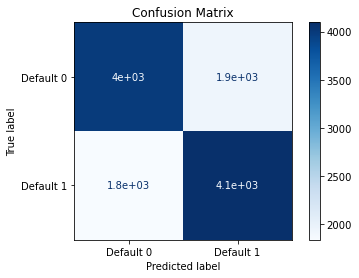

In [186]:
y_test_pred[y_test_pred <= 0.5] = 0
y_test_pred[y_test_pred >= 0.5] = 1

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_test_pred)
print(confusion_mtx)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx, display_labels=['Default 0', 'Default 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [6]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
#dummy_clf = DummyClassifier(strategy="stratified")
#dummy_clf.fit(train_df.drop(['LoanID', 'Default'], axis=1), train_df.Default)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [187]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
#predicted_probability = dummy_clf.predict_proba(test_df.drop(['LoanID'], axis=1))[:, 1]
test_preprocessed = full_pipeline.fit_transform(test_df)

In [188]:
test_preprocessed.shape

(109435, 27)

In [189]:
predicted_probability = model.predict(test_preprocessed)

In [190]:
predicted_probability = predicted_probability.flatten()

In [191]:
predicted_probability[0]

0.41262555

In [192]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [193]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0.412626
1,JDL5RH07AM,0.238963
2,STAL716Y79,0.160876
3,SO0KKJ3IQB,0.649422
4,T99CWTYDCP,0.543921
5,0SNHFWV4UP,0.423537
6,S6ITP6LGYS,0.187756
7,A6I7U12IRJ,0.298225
8,8W6KY50JU4,0.437125
9,THFQ08OLMU,0.389226


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [194]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [195]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [196]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [197]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [198]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!